# $\color{Red}{\mathbf{OpenCV}}$ Primer

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import pickle
from tqdm import tqdm
import cv2
import os
import sys

In [2]:
cwd = os.getcwd()
cat_folder = cwd + '\\train\\cat\\'
dog_folder = cwd + '\\train\\dog\\'

## `cv2.imread` 读取图片

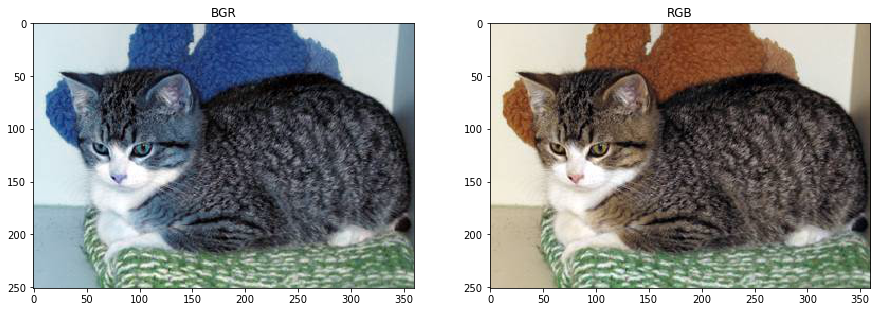

In [83]:
# 色彩通道顺序变换
random_img = np.random.choice(range(12500))
path = cat_folder + str(random_img) + '.jpg'
img = cv2.imread(path)
img_2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('BGR')
plt.subplot(122)
plt.imshow(img_2, cmap='gray')
plt.title('RGB')
plt.show()

### 查看图片体积和像素矩阵体积

In [84]:
print("File Size:", os.path.getsize(path), 'Byte')
print("Array Size:", sys.getsizeof(img), 'Byte')
print("JPEG Compress Ratio:", np.round(os.path.getsize(path) / sys.getsizeof(img) * 100, 2), '%')

File Size: 17832 Byte
Array Size: 271208 Byte
JPEG Compress Ratio: 6.58 %


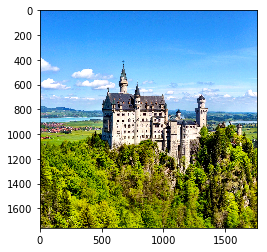

File Size: 22617 Byte
Array Size: 9271820 Byte
JPG Compress Ratio: 0.24 %


In [72]:
img = cv2.imread('view.jpg')
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.imshow(img)
plt.show()
print("File Size:", os.path.getsize(path), 'Byte')
print("Array Size:", sys.getsizeof(img), 'Byte')
print("JPG Compress Ratio:", np.round(os.path.getsize(path) / sys.getsizeof(img) * 100, 2), '%')

可以看到，对于不同的图片压缩格式和图片内容，其压缩率很不一样。对于这种验证码的图片，由于本身就没什么信息，复杂度较低，因此压缩前后体积变化不大。而对于生活中的物体的图片，由于图片所含的细节很多，因此压缩率可以很高。

## 图像变换

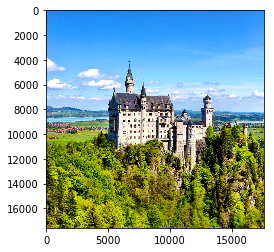

Array Size: 927169200 Bytes
JPG File Size: 36742914 Bytes
PNG File Size: 230686749 Bytes


In [71]:
# 等比例放大100倍，图像体积其实已经增大到200M，但是经过JPG压缩后体积能够缩小至2M，经过无损压缩的PNG图片则需要14M左右。
s = img.shape[0]
img_resize = cv2.resize(img, (s*10, s*10))
plt.imshow(img_resize)
plt.show()
print("Array Size:", img_resize.nbytes, 'Bytes')
b,g,r = cv2.split(img_resize)
img_resize = cv2.merge([r,g,b])
cv2.imwrite('test.jpg', img_resize)
cv2.imwrite('test.png', img_resize)
print("JPG File Size:", os.path.getsize('test.jpg'), 'Bytes')
print("PNG File Size:", os.path.getsize('test.png'), 'Bytes')

### 手写一个棋盘状图片矩阵，然后使用resize看效果

- `cv2.resize` 函数实际上计算的是目的图片到原图片的映射关系（interpolation）。

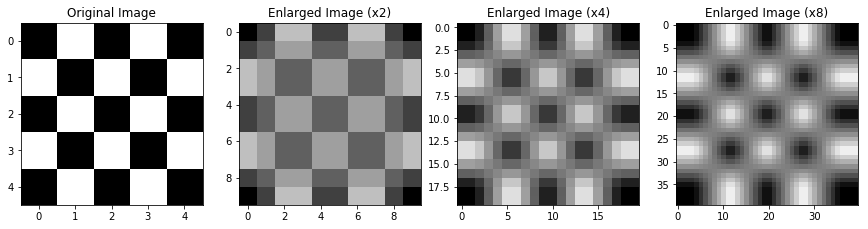

In [55]:
# 放大棋盘
checkerboard = [[0, 255, 0, 255, 0], 
                [255, 0, 255, 0, 255], 
                [0, 255, 0, 255, 0], 
                [255, 0, 255, 0, 255], 
                [0, 255, 0, 255, 0]]
mat = np.array(checkerboard, dtype = np.uint8)
mat = cv2.merge([mat, mat, mat])
mat_resize_x2 = cv2.resize(mat, (10, 10))
mat_resize_x4 = cv2.resize(mat, (20, 20))
mat_resize_x8 = cv2.resize(mat, (40, 40))
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(mat)
plt.title("Original Image")
plt.subplot(142)
plt.imshow(mat_resize_x2)
plt.title("Enlarged Image (x2)")
plt.subplot(143)
plt.imshow(mat_resize_x4)
plt.title("Enlarged Image (x4)")
plt.subplot(144)
plt.imshow(mat_resize_x8)
plt.title("Enlarged Image (x8)")
plt.show()

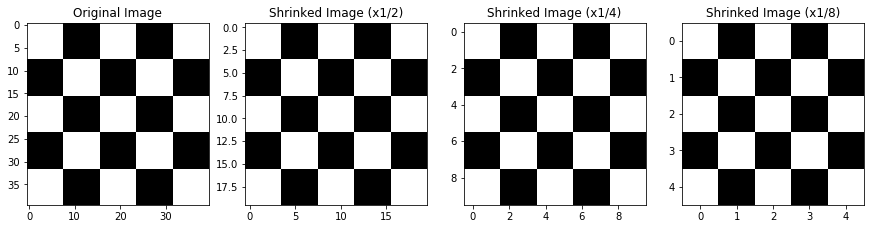

In [58]:
# 缩小棋盘（没有影响）
black = 255 * np.ones((8, 8), dtype=np.uint8)
white = np.zeros((8, 8), dtype=np.uint8)
pattern1 = np.concatenate((black, white, black, white, black), axis=0)
pattern2 = np.concatenate((white, black, white, black, white), axis=0)
mat = np.concatenate((pattern1, pattern2, pattern1, pattern2, pattern1), axis=1)
mat = cv2.merge([mat, mat, mat])
mat_resize_x1_2 = cv2.resize(mat, (20, 20))
mat_resize_x1_4 = cv2.resize(mat, (10, 10))
mat_resize_x1_8 = cv2.resize(mat, (5, 5))
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(mat)
plt.title("Original Image")
plt.subplot(142)
plt.imshow(mat_resize_x1_2)
plt.title("Shrinked Image (x1/2)")
plt.subplot(143)
plt.imshow(mat_resize_x1_4)
plt.title("Shrinked Image (x1/4)")
plt.subplot(144)
plt.imshow(mat_resize_x1_8)
plt.title("Shrinked Image (x1/8)")
plt.show()

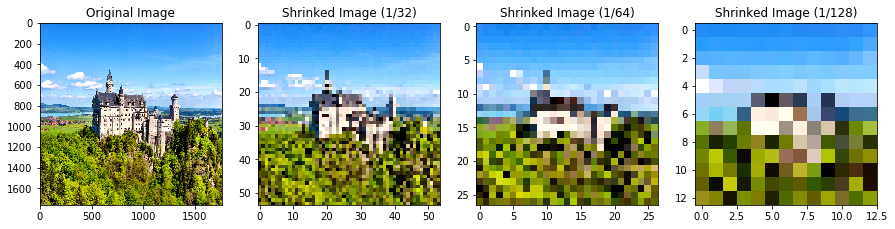

In [73]:
# 缩小风景图片：影响很明显
mat = cv2.imread('view.jpg')
s = mat.shape[0]
b,g,r = cv2.split(mat)
mat = cv2.merge([r,g,b])
mat_resize_x1_2 = cv2.resize(mat, (s//32, s//32))
mat_resize_x1_4 = cv2.resize(mat, (s//64, s//64))
mat_resize_x1_8 = cv2.resize(mat, (s//128, s//128))
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(mat)
plt.title("Original Image")
plt.subplot(142)
plt.imshow(mat_resize_x1_2)
plt.title("Shrinked Image (1/32)")
plt.subplot(143)
plt.imshow(mat_resize_x1_4)
plt.title("Shrinked Image (1/64)")
plt.subplot(144)
plt.imshow(mat_resize_x1_8)
plt.title("Shrinked Image (1/128)")
plt.show()